In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [4]:
data = pd.read_csv('../data/titanic_data.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    float64
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [11]:
features = pd.get_dummies(data, prefix=['Sex', 'Embarked'])

In [13]:
features.drop(labels=['Sex_male'], axis=1, inplace=True)

In [14]:
features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,1,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,0,0,1


In [15]:
features.Survived.value_counts()

0.0    424
1.0    288
Name: Survived, dtype: int64

In [16]:
y = features.Survived

In [35]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
885    0.0
886    0.0
887    1.0
889    1.0
890    0.0
Name: Survived, Length: 712, dtype: float64

In [17]:
x = features.drop(labels=['Survived'], axis=1)

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

In [19]:
X = StandardScaler().fit_transform(x)

In [20]:
logr = LogisticRegression()

In [21]:
logr.fit(X, y)

LogisticRegression()

In [22]:
logr.score(X, y)

0.800561797752809

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=322)

In [37]:
lcv = LogisticRegressionCV(Cs=100, cv=10, random_state=322)

In [38]:
lcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, cv=10, random_state=322)

In [39]:
lcv.score(X_test, y_test)

0.7640449438202247

In [40]:
lcv.coef_

array([[-0.49715181, -0.31070952, -0.09761862, -0.02742674,  0.1883734 ,
         0.8268768 ,  0.15615168, -0.06724915, -0.11372002]])

In [41]:
lcv.intercept_

array([-0.42920688])

In [42]:
y_pred = lcv.predict(X_test)

<AxesSubplot:>

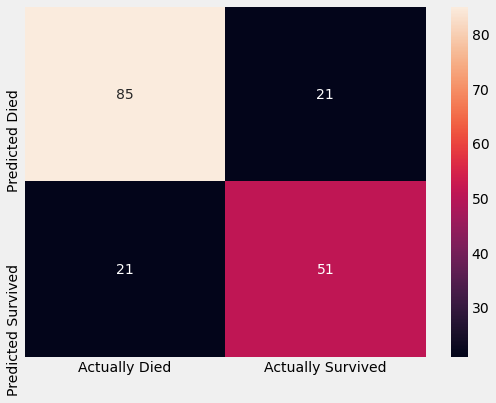

In [44]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, yticklabels=['Predicted Died', 'Predicted Survived'], xticklabels=['Actually Died', 'Actually Survived'])

In [45]:
from sklearn.metrics import plot_precision_recall_curve

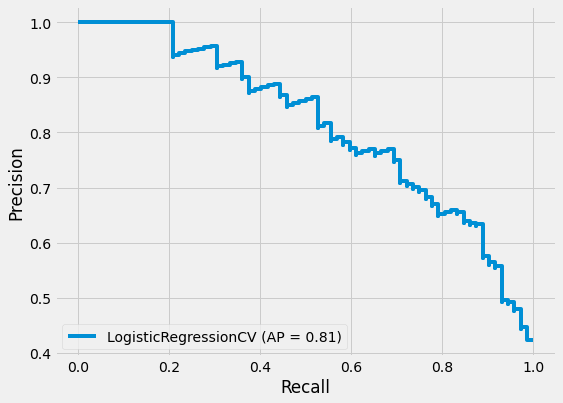

In [46]:
plot_precision_recall_curve(lcv, X_test, y_test)